In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
f = "/content/drive/MyDrive/Solar energy prediction - Project/Datasets/eco2mix-regional-cons-def-idf-2017-2020.csv"
path_out = "/content/drive/MyDrive/Solar energy prediction - Project/Datasets/Out/"
df = pd.read_csv(f, sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33,54,56,58,60,62,64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Flux physiques d'Auvergne-Rhône-Alpes vers Grand-Est,Flux physiques de Bourgogne-Franche-Comté vers Grand-Est,Flux physiques de Bretagne vers Grand-Est,Flux physiques de Centre-Val de Loire vers Grand-Est,Flux physiques de Grand-Est vers Grand-Est,Flux physiques de Hauts-de-France vers Grand-Est,Flux physiques d'Ile-de-France vers Grand-Est,Flux physiques de Normandie vers Grand-Est,Flux physiques de Nouvelle-Aquitaine vers Grand-Est,Flux physiques d'Occitanie vers Grand-Est,Flux physiques de Pays-de-la-Loire vers Grand-Est,Flux physiques de PACA vers Grand-Est,Flux physiques de Grand-Est vers Auvergne-Rhône-Alpes,Flux physiques de Grand-Est vers Bourgogne-Franche-Comté,Flux physiques de Grand-Est vers Bretagne,Flux physiques de Grand-Est vers Centre-Val de Loire,Flux physiques de Grand-Est vers Grand-Est.1,Flux physiques de Grand-Est vers Hauts-de-France,Flux physiques de Grand-Est vers Ile-de-France,Flux physiques de Grand-Est vers Normandie,Flux physiques de Grand-Est vers Nouvelle-Aquitaine,Flux physiques de Grand-Est vers Occitanie,Flux physiques de Grand-Est vers Pays-de-la-Loire,Flux physiques de Grand-Est vers PACA,Flux physiques Allemagne vers Grand-Est,Flux physiques Belgique vers Grand-Est,Flux physiques Espagne vers Grand-Est,Flux physiques Italie vers Grand-Est,Flux physiques Luxembourg vers Grand-Est,Flux physiques Royaume-Uni vers Grand-Est,Flux physiques Suisse vers Grand-Est,Flux physiques de Grand-Est vers Allemagne,Flux physiques de Grand-Est vers Belgique,Flux physiques de Grand-Est vers Espagne,Flux physiques de Grand-Est vers Italie,Flux physiques de Grand-Est vers Luxembourg,Flux physiques de Grand-Est vers Royaume-Uni,Flux physiques de Grand-Est vers Suisse,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%)
0,11,Île-de-France,Données définitives,2017-01-01,00:00,2017-01-01T00:00:00+01:00,11999,534,NaN,0,0,8,NaN,158,11298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,Île-de-France,Données définitives,2017-01-01,00:30,2017-01-01T00:30:00+01:00,11770,536,NaN,0,0,8,NaN,157,11069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,Île-de-France,Données définitives,2017-01-01,01:00,2017-01-01T01:00:00+01:00,11567,536,NaN,0,0,8,NaN,160,10863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Île-de-France,Données définitives,2017-01-01,01:30,2017-01-01T01:30:00+01:00,11277,534,NaN,0,0,8,NaN,159,10576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,Île-de-France,Données définitives,2017-01-01,02:00,2017-01-01T02:00:00+01:00,10902,536,NaN,0,0,8,NaN,159,10199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_idf_solar = df[['Date - Heure',  'Date', 'Heure','Solaire (MW)']]
df_idf_solar.head()

,Date - Heure,Date,Heure,Solaire (MW)
0,2017-01-01T00:00:00+01:00,2017-01-01,00:00,0
1,2017-01-01T00:30:00+01:00,2017-01-01,00:30,0
2,2017-01-01T01:00:00+01:00,2017-01-01,01:00,0
3,2017-01-01T01:30:00+01:00,2017-01-01,01:30,0
4,2017-01-01T02:00:00+01:00,2017-01-01,02:00,0


In [34]:
df_idf_solar['Date - Heure'] = df_idf_solar['Date - Heure'].str[:19]
df_idf_solar['Date - Heure'] = pd.to_datetime(df_idf_solar['Date - Heure'], format="%Y-%m-%dT%H:%M:%S")
#df_idf_solar['Date'] = pd.to_datetime(df_idf_solar['Date'], format="%Y-%m-%d")
#df_idf_solar['Heure'] = pd.to_datetime(df_idf_solar['Heure']).dt.strftime('%H:%M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df_idf_solar.drop(columns=['Date', 'Heure'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
df_idf_solar.head()

,Date - Heure,Solaire (MW)
0,2017-01-01 00:00:00,0
1,2017-01-01 00:30:00,0
2,2017-01-01 01:00:00,0
3,2017-01-01 01:30:00,0
4,2017-01-01 02:00:00,0


In [42]:
###resample the data by hour
df_hourly = df_idf_solar.resample('H', on= 'Date - Heure').sum()

In [43]:
df_hourly.head()

,Solaire (MW)
Date - Heure,
2017-01-01 00:00:00,0
2017-01-01 01:00:00,0
2017-01-01 02:00:00,0
2017-01-01 03:00:00,0
2017-01-01 04:00:00,0


In [47]:
df_hourly.to_csv(os.path.join(path_out, 'IDF_solar_production_hourly_2017-2020.csv'))

# **Data exploration**
By resampling the data, we find the following patterns:
- **hour of the day**: the production of solar energy reaches the peak at 13h, and is negligible from 22:00 to 06:00 which is the hour of the night
- **month of the year**: the production of solar energy in ile-de-France region is the highest from May to July (spring to summer season), and is the lowest from November to February (winter season)
- **yearly evolution**: from 2017 to 2020, the production of solar energy grows at an increasing rate, 17% from 2017 to 2018, then 20% from 2018 to 2019 and reaches 28% from 2019 to 2020

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

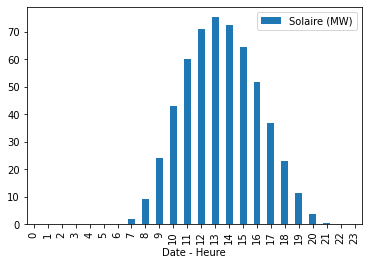

In [44]:
###Average production of solar energy per hour of the day
df_hourly.groupby(df_hourly.index.hour).mean().plot(kind='bar')

In [60]:
df_monthly = df_hourly.groupby(df_hourly.index.month).mean()

[Text(0, 0.5, 'Average solar production'), Text(0.5, 0, 'Month')]

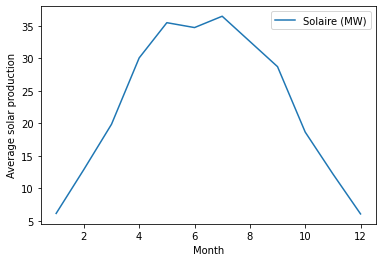

In [53]:
g = sns.lineplot(data=df_monthly)
g.set(xlabel = 'Month', ylabel='Average solar production' )

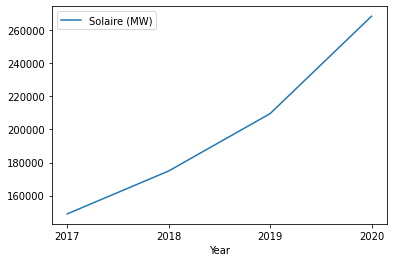

In [64]:
df_yearly = df_hourly.groupby(df_hourly.index.year).sum()
df_yearly.plot(kind='line', xlabel = 'Year', xticks = [2017,2018,2019,2020])


In [66]:
df_yearly['Annual_growth_rate'] = df_yearly.pct_change()

In [67]:
df_yearly

,Solaire (MW),Annual_growth_rate
Date - Heure,,
2017,148961,NaN
2018,174877,0.173978
2019,209532,0.198168
2020,268359,0.280754
